In [2]:
!pip install opendatasets

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_similarity


In [8]:
import opendatasets as od


books = pd.read_csv('/Books.csv')

# Load the Users dataset
users = pd.read_csv('/Users.csv')

# Load the Ratings dataset
ratings = pd.read_csv('/Ratings.csv')
# Display the first few rows of each dataset to verify they are loaded
print("Books Data:\n", books.head())
print("\nUsers Data:\n", users.head())
print("\nRatings Data:\n", ratings.head())

Books Data:
          ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author  Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                 2002     Oxford University Press   
1  Richard Bruce Wright                 2001       HarperFlamingo Canada   
2          Carlo D'Este                 1991             HarperPerennial   
3      Gina Bari Kolata                 1999        Farrar Straus Giroux   
4       E. J. W. Barber                 1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http:/

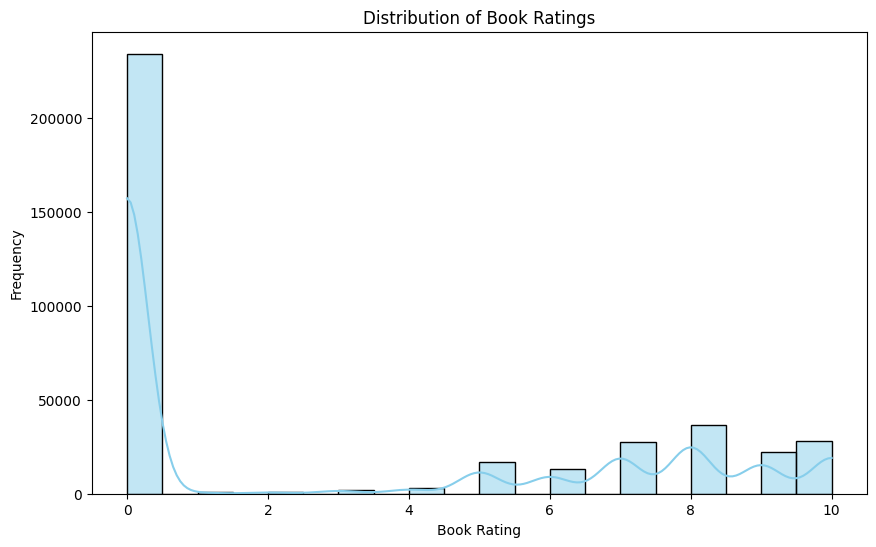

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot the distribution of ratings
plt.figure(figsize=(10,6))
sns.histplot(ratings['Book-Rating'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Book Ratings")
plt.xlabel("Book Rating")
plt.ylabel("Frequency")
plt.show()


<ipython-input-10-1ec13b14e98a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_books.index, y=top_books.values, palette="viridis")


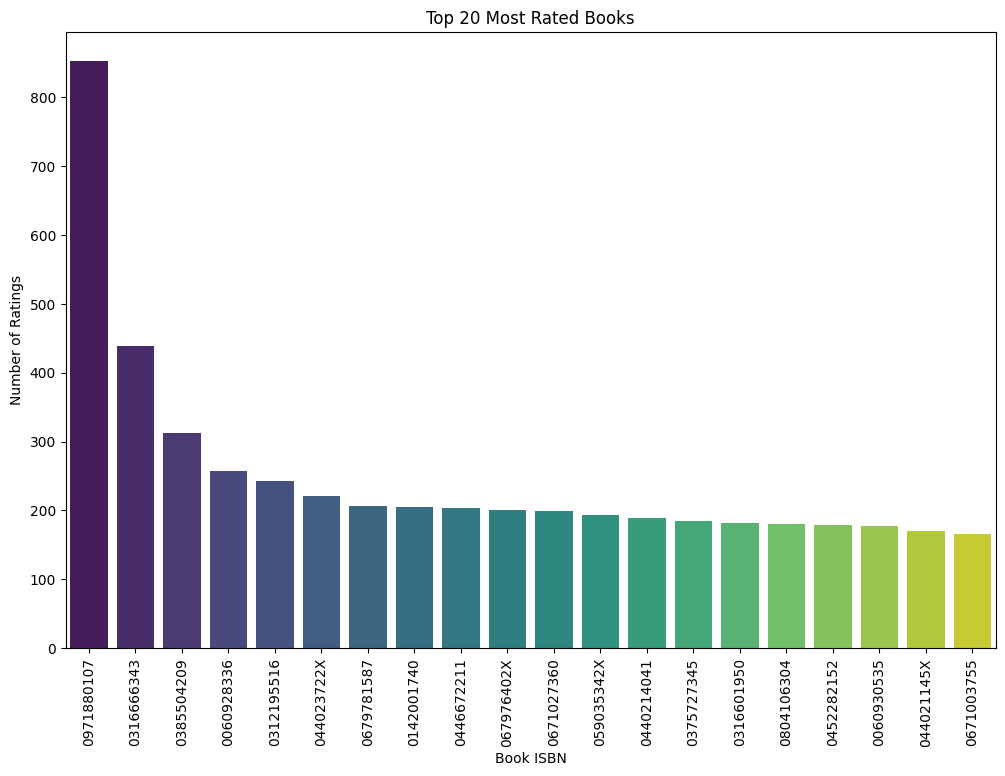

In [10]:
# count the number of ratings per book
rating_counts = ratings['ISBN'].value_counts()

# plot the top 20 books with the most ratings
top_books = rating_counts.head(20)

plt.figure(figsize=(12,8))
sns.barplot(x=top_books.index, y=top_books.values, palette="viridis")
plt.title("Top 20 Most Rated Books")
plt.xlabel("Book ISBN")
plt.ylabel("Number of Ratings")
plt.xticks(rotation=90)
plt.show()


<ipython-input-11-989bccb59c8c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.index, y=top_users.values, palette="coolwarm")


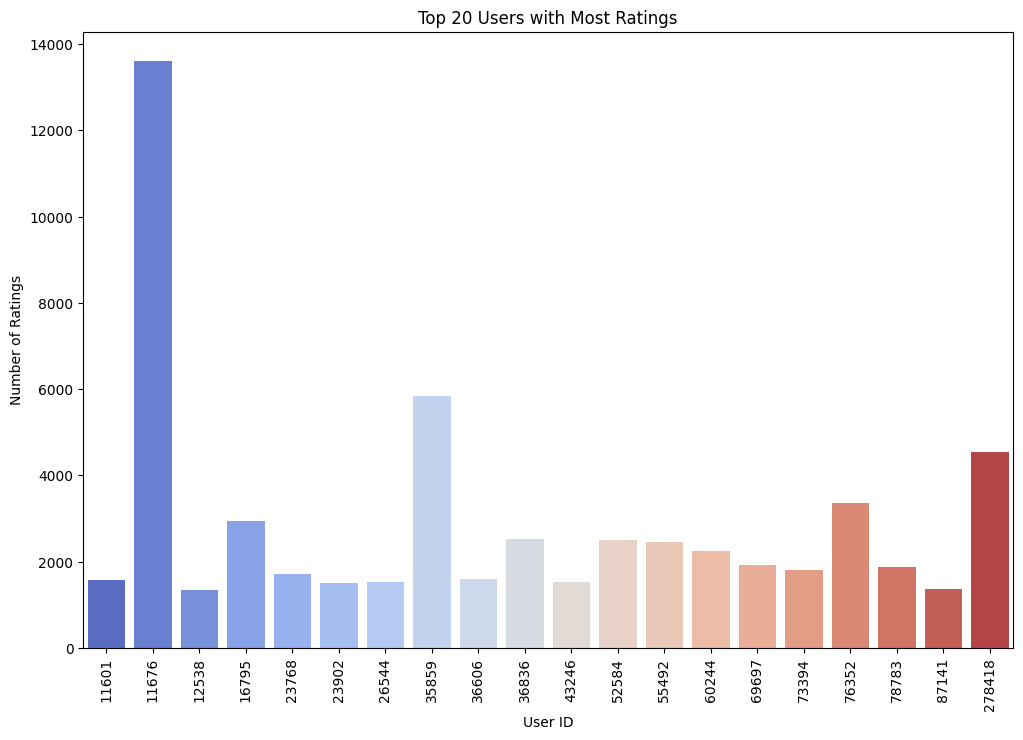

In [11]:
# Count the number of ratings per user
user_counts = ratings['User-ID'].value_counts()

# Plot the top 20 users with the most ratings
top_users = user_counts.head(20)

plt.figure(figsize=(12,8))
sns.barplot(x=top_users.index, y=top_users.values, palette="coolwarm")
plt.title("Top 20 Users with Most Ratings")
plt.xlabel("User ID")
plt.ylabel("Number of Ratings")
plt.xticks(rotation=90)
plt.show()


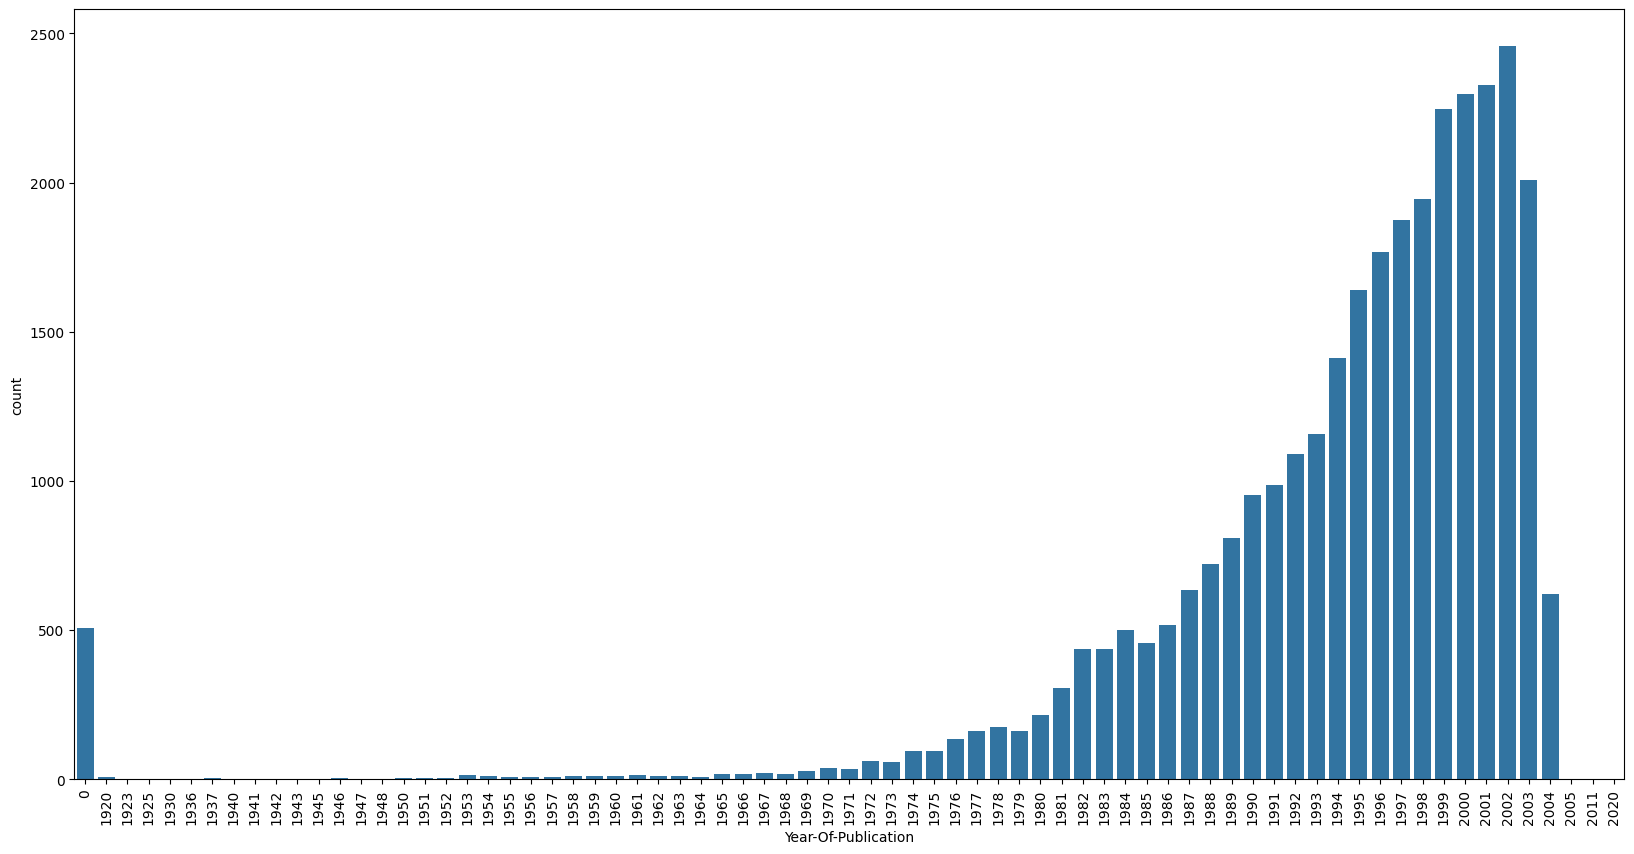

In [13]:
plt.figure(figsize=(20,10))
sns.countplot(x=books['Year-Of-Publication'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Location'>

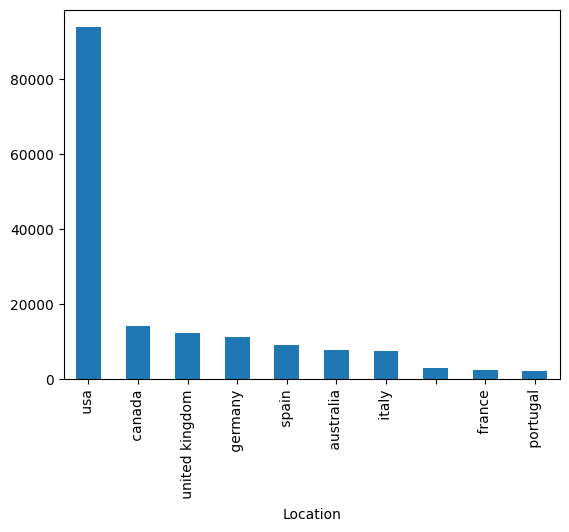

In [15]:
users['Location'] = users['Location'].apply(lambda x: str(x).split(',')[-1] if isinstance(x, str) else '')
users['Location'].value_counts().head(10).plot(kind='bar')
